# I. Thông tin Dataset

## Nguồn gốc
Dataset được cung cấp lấy từ Kaggle (https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)

## Nội dung
Dataset bao gồm các dữ liệu được ghi nhận lại thông qua hoạt động mua sắm của khách hàng.

Dataset bao gồm nhiều features có liên quan tới hành vi mua sắm mua khách hàng, bao gồm các thông tin cần thiết để các doanh nghiệp có thể nâng cao sự thấu hiểu đối với khách hàng của mình (giới tính, tuổi, phương thức thanh toán ...).


___

# II. Khám phá dữ liệu

## Import thư viện cần thiết

Trước hết, import các thư viện cần thiết cho việc khám phá, xử lý và phân tích trở nên dễ dàng hơn.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set option để dễ đọc giá float hơn

In [206]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Đọc dataset từ file csv
Đọc dữ liệu từ file `shopping_trends.csv` được cung cấp

In [207]:
raw_df = pd.read_csv("../data/raw/shopping_trends.csv")

In ra 5 dòng đầu tiên của dataset để có thể nắm bắt được khái quát các cột và nội dung của mỗi observation


In [208]:
raw_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.00,Kentucky,L,Gray,Winter,3.10,Yes,Credit Card,Express,Yes,Yes,14.00,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.00,Maine,L,Maroon,Winter,3.10,Yes,Bank Transfer,Express,Yes,Yes,2.00,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.00,Massachusetts,S,Maroon,Spring,3.10,Yes,Cash,Free Shipping,Yes,Yes,23.00,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.00,Rhode Island,M,Maroon,Spring,3.50,Yes,PayPal,Next Day Air,Yes,Yes,49.00,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.00,Oregon,M,Turquoise,Spring,2.70,Yes,Cash,Free Shipping,Yes,Yes,31.00,PayPal,Annually


## Số dòng và cột

In [209]:
raw_df.shape

(3907, 19)

Dễ dàng thấy rằng dataset bao gồm 3900 dòng và 18 cột

## Ý nghĩa của các dòng

Mỗi dòng tương ứng với một quan sát của một hoạt động mua sắm của khách hàng tại thời điểm cụ thể nào đó. Mỗi dòng cung cấp các thông tin như giới tính, tuổi, loại quần áo, giá thành...


## Ý nghĩa của các cột

Để hiểu rõ hơn về nội dung của dataset, ta cần phải giải thích ý nghĩa của từng cột trong dataset. 

- `Customer ID` - giá trị để phân biệt các khách hàng 

- `Age` - tuổi của khách hàng

- `Gender` - giới tính khách hàng

- `Item Purchased` - sản phẩm đã mua

- `Category` - phân loại của sản phẩm

- `Purchase Amount (USD)` - giá tiền đã trả (USD)

- `Location` - địa điểm mua hàng

- `Size` - kích cỡ sản phẩm

- `Color` - màu sắc sản phẩm

- `Season` - mùa mua hàng (tính tại thời điểm mua)

- `Review Rating` - đánh giá sản phẩm từ khách hàng

- `Subscription Status` - chỉ ra khách hàng có là hội viên hay không (Y/N)

- `Payment Method` - phương thức thanh toán

- `Shipping Type` - phương thức giao hàng (chọn bởi khách hàng)

- `Discount Applied` - sản phẩm được giảm giá (Y/N)

- `Promo Code Used` - áp dụng mã giảm giá (Y/N)

- `Previous Purchases` - số lượng giao dịch đến nay (không tính giao dịch hiện tại)

- `Preferred Payment Method`  - phương thức thanh toán được ưu tiên bởi khách hàng

- `Frequency of Purchases` - tần suất mua sắm

## Kiểm tra sự trùng lắp của các dòng


Để kiểm tra giữa các dòng có sự trùng lắp hay không ta thực hiện như sau:

In [210]:
raw_df.duplicated().sum()

7

Output là 7 cho thấy có sự trùng lắp giữa các dòng.

Loại bỏ các dòng dữ liệu trùng nhau

In [211]:
raw_df = raw_df.drop_duplicates()

Kiểm tra lại sự trùng lắp

In [212]:
raw_df.duplicated().sum()

0

## Liệu kiểu dữ liệu của các cột đã hợp lý hay chưa?

Trước hết, quan sát kiểu dữ liệu khi đọc lên từ file csv

In [213]:
raw_df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)       float64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases          float64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

- `Customer ID` có kiểu dữ liệu là `int64`, tuy nhiên mục đích của `Customer ID` là để phân biệt các khách hàng với nhau. Do đó, ta nên chuyển về kiểu Categorical thì hợp lý hơn là Numerical như hiện tại.

- `Purchase Amount (USD)` có dữ liệu là `float64` trong khi dữ liệu thực tế trong file `.csv` cho thấy nó nên là `int64`

- `Previous Purchases` nên có kiểu `int64` thì mới hợp lý

- Xem xét các cột còn lại, kiểu dữ liệu của từng cột đã hợp lý, không cần thao tác gì thêm.

Kiểm tra số lượng missing value trong cột `Purchase Amount (USD)`

In [214]:
raw_df["Purchase Amount (USD)"].isna().sum()

13

Missing values là `13`. Đây là lí do khiến cho cột này có kiểu dữ liệu là `float64` thay vì `int64`. Các dòng không có dữ liệu khi đọc lên sẽ mang giá trị `nan` (một giá trị kiểu float) cho nên cả cột sẽ có kiểu dữ liệu là `float64`

Kiểm tra số lượng missing value trong cột `Previous Purchases`

In [215]:
raw_df["Previous Purchases"].isna().sum()

8

Missing values là `8`. Đây là lí do khiến cho cột này có kiểu dữ liệu là `float64` thay vì `int64`. Các dòng không có dữ liệu khi đọc lên sẽ mang giá trị `nan` (một giá trị kiểu float) cho nên cả cột sẽ có kiểu dữ liệu là `float64`

Đổi kiểu dữ liệu của cột `Customer ID` sang `Categorical`

In [216]:
raw_df["Customer ID"] = raw_df["Customer ID"].astype("object")
raw_df.dtypes

Customer ID                  object
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)       float64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases          float64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

----
## Sự phân bố của các cột Numerical

Các cột Numerical trong Dataset gồm có:

- `Age`

- `Purchase Amount (USD)`

- `Review Rating`

- `Previous Purchases`

In [217]:
numeric_col = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
raw_df[numeric_col].head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53.00,3.10,14.00
1,19,64.00,3.10,2.00
2,50,73.00,3.10,23.00
3,21,90.00,3.50,49.00
4,45,49.00,2.70,31.00


Kiểm tra missing values của các cột trong `num_df`

In [218]:
raw_df[numeric_col].isnull().sum()

Age                       0
Purchase Amount (USD)    13
Review Rating             0
Previous Purchases        8
dtype: int64

**Nhận xét**

Nhìn chung, các cột `numerical` có missing values là:
- `Purchase Amount (USD)`

- `Previous Purchases`

### Xử lý missing values cho cột `Purchase Amount (USD)`

Một trong những cách xử lý missing value cho cột này chính là thay những chỗ mất mát dữ liệu bằng `mean` dựa trên `Item Purchased`. Bởi vì

- Mỗi loại quần áo khác nhau thì sẽ có nằm ở những mức giá tiền khác nhau

- Thay bằng mean của cả cột thì sẽ kém chính xác hơn

**Lưu ý** vì sử dụng `mean` để thay vào missing values cho nên không cần chuyển cột này sang kiểu dữ liêu `int64` nữa.

Ta tính mean của `Purchase Amount (USD)` dựa trên `Item Purchased`

In [219]:
price_dict = raw_df.groupby("Item Purchased")["Purchase Amount (USD)"].mean().to_dict()

Fill nan bằng giá trị tương ứng trong `price_dict`

In [220]:
raw_df["Purchase Amount (USD)"] = raw_df.apply(lambda row : price_dict[row["Item Purchased"]] if pd.isna(row["Purchase Amount (USD)"]) else row["Purchase Amount (USD)"], axis=1)
print(f'Số lượng giá trị nan: {raw_df["Purchase Amount (USD)"].isna().sum()}')

Số lượng giá trị nan: 0


### Xử lý missing values cho cột `Previous Purchases`

Với các missing values ở cột này, ta sẽ fill nan bằng giá trị `0`.

In [221]:
raw_df["Previous Purchases"] = raw_df["Previous Purchases"].fillna(0)
print(f'Số lượng giá trị nan: {raw_df["Previous Purchases"].isna().sum()}')

Số lượng giá trị nan: 0


Gọi phương thức `describe()` để hiển thị **summary statistics** của các cột `Numerical`

In [222]:
raw_df[numeric_col].describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00
mean,44.07,59.76,3.75,25.34
std,15.21,23.63,0.72,14.46
min,18.00,20.00,2.50,0.00
25%,31.00,39.00,3.10,13.00
50%,44.00,60.00,3.70,25.00
75%,57.00,80.00,4.40,38.00
max,70.00,100.00,5.00,50.00


**Nhận xét**

- Các giá trị min, max đã hợp lý và không có cột nào mang giá trị min, max bất thường

Text(0.5, 0.98, 'Distribution of numeric columns')

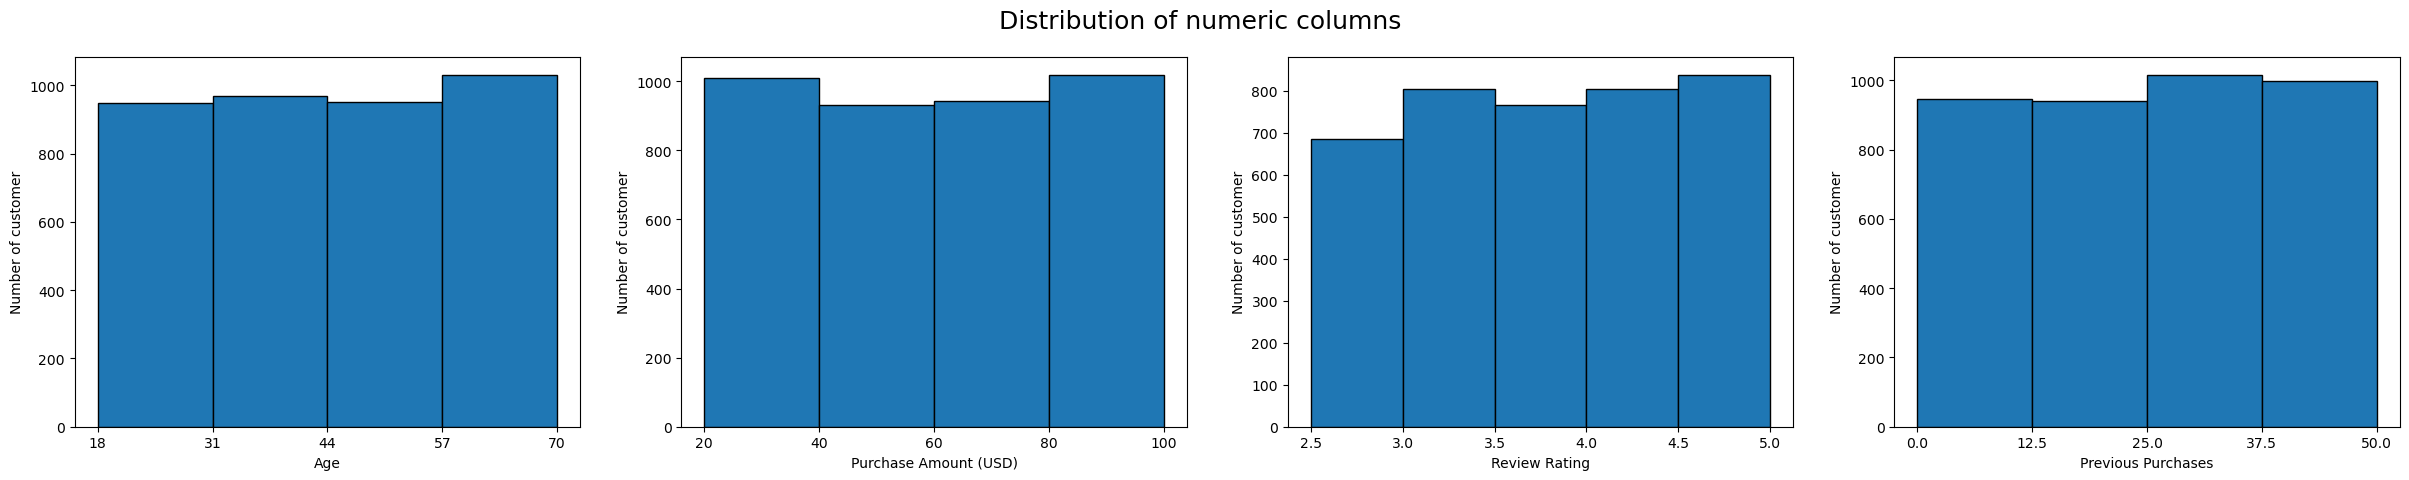

In [223]:
fig, ax = plt.subplots(1, 4)
fig.set_figwidth(30)

n_bins = [4, 4, 5, 4]

for i, col in enumerate(numeric_col):
    #raw_df[col].hist(ax= ax[i], edgecolor = "black", grid=False)
    hist = ax[i].hist(raw_df[col], edgecolor = "black", bins = n_bins[i])
    ax[i].set_xticks(hist[1])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Number of customer")

fig.suptitle("Distribution of numeric columns", size=18)

**Nhận xét**
- Phân bố của các cột numeric là khá đồng đều, không có sự chênh lệch quá lớn giữa các bins.

----

## Sự phân bố của các cột Categorical


Các cột categorical trong Dataset gồm các cột còn lại:
- `Customer ID`

- `Gender`

- `Item Purchased`

- `Category`

- `Location`

- `Size`

- `Color`

- `Season`

- `Subscription Status`

- `Payment Method`

- `Shipping Type`

- `Discount Applied`

- `Promo Code Used`

- `Preferred Payment Method`

- `Frequency of Purchases`

In [224]:
categolical_cols = raw_df.select_dtypes(include="object").columns.tolist()
raw_df[categolical_cols].head()

,Customer ID,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
0,1,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,Venmo,Fortnightly
1,2,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,Cash,Fortnightly
2,3,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly
3,4,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
4,5,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,PayPal,Annually


Kiểm tra missing values của các cột `Categorical`:

In [225]:
raw_df[categolical_cols].isnull().sum()

Customer ID                  0
Gender                       0
Item Purchased               0
Category                     0
Location                    14
Size                         0
Color                        0
Season                       0
Subscription Status          0
Payment Method               0
Shipping Type                6
Discount Applied             0
Promo Code Used              0
Preferred Payment Method     0
Frequency of Purchases      10
dtype: int64

Nhìn chung, các cột `Categorical` có missing value và số lượng là:
- `Location`: 14

- `Shipping Type`: 6

- `Frequency of Purchases`: 10

Đây là những cột mang dữ liệu cần thiết để phân tích hành vi mua sắm của người dùng. Nếu thiếu thì sự phân tích sẽ không có ý nghĩa nên chúng ta sẽ loại bỏ những dòng dữ liệu thiếu đi các cột này.

Ta sẽ sử dụng hàm `dropna()` để loại bỏ đi các hàng thiếu đi giá trị ở các cột này:

In [226]:
mising_cols = ['Location', 'Shipping Type', 'Frequency of Purchases']
raw_df.dropna(subset=mising_cols, inplace=True)

Kiểm tra lại missing value của các cột này:

In [227]:
raw_df[mising_cols].isnull().sum()

Location                  0
Shipping Type             0
Frequency of Purchases    0
dtype: int64

Bây giờ tất cả các cột điều đã được xử lý, chúng ta sẽ tiến hành phân tích các cột `Categorical` trừ cột `Customer ID` vì đây là key

Đối với mỗi cột, chúng ta sẽ tính các thuộc tính khác nhau và số lượng của từng thuộc tính

Ta sẽ tạo ra một bảng `categorical_profile` với các cột tương ứng với các cột `Categorical` và 2 dòng `num_diff_vals` và `distribution`:

- `num_diff_vals`: số lượng các thuộc tính khác khau

- `distribution`: là một dict với khoá là các thuộc tính và giá trị là số lượng từng thuộc tính

In [228]:
df = raw_df[categolical_cols].drop(columns=["Customer ID"])

categorical_profile = pd.DataFrame(columns=df.columns.tolist(), index=['num_diff_vals', 'distribution'])
categorical_profile.loc['num_diff_vals'] = df.nunique()
categorical_profile.loc['distribution'] = df.apply(lambda x: x.value_counts().to_dict())

categorical_profile

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
num_diff_vals,2,25,4,50,4,25,4,2,6,6,2,2,6,7
distribution,"{'Male': 2629, 'Female': 1241}","{'Shirt': 169, 'Jewelry': 169, 'Pants': 168, '...","{'Clothing': 1721, 'Accessories': 1230, 'Footw...","{'Montana': 96, 'California': 94, 'Idaho': 93,...","{'M': 1739, 'L': 1049, 'S': 657, 'XL': 425}","{'Olive': 174, 'Yellow': 173, 'Teal': 172, 'Si...","{'Spring': 992, 'Fall': 969, 'Winter': 960, 'S...","{'No': 2839, 'Yes': 1031}","{'Credit Card': 689, 'Venmo': 648, 'Cash': 644...","{'Free Shipping': 669, 'Standard': 651, 'Store...","{'No': 2215, 'Yes': 1655}","{'No': 2215, 'Yes': 1655}","{'PayPal': 672, 'Cash': 668, 'Credit Card': 66...","{'Every 3 Months': 579, 'Annually': 569, 'Quar..."


Trực quan hoá `categorical_profile`. Ta không trực quan hoá cột `Location` vì nó có sự phân hoá khá cao, không có ý nghĩa trong việc phân tích.

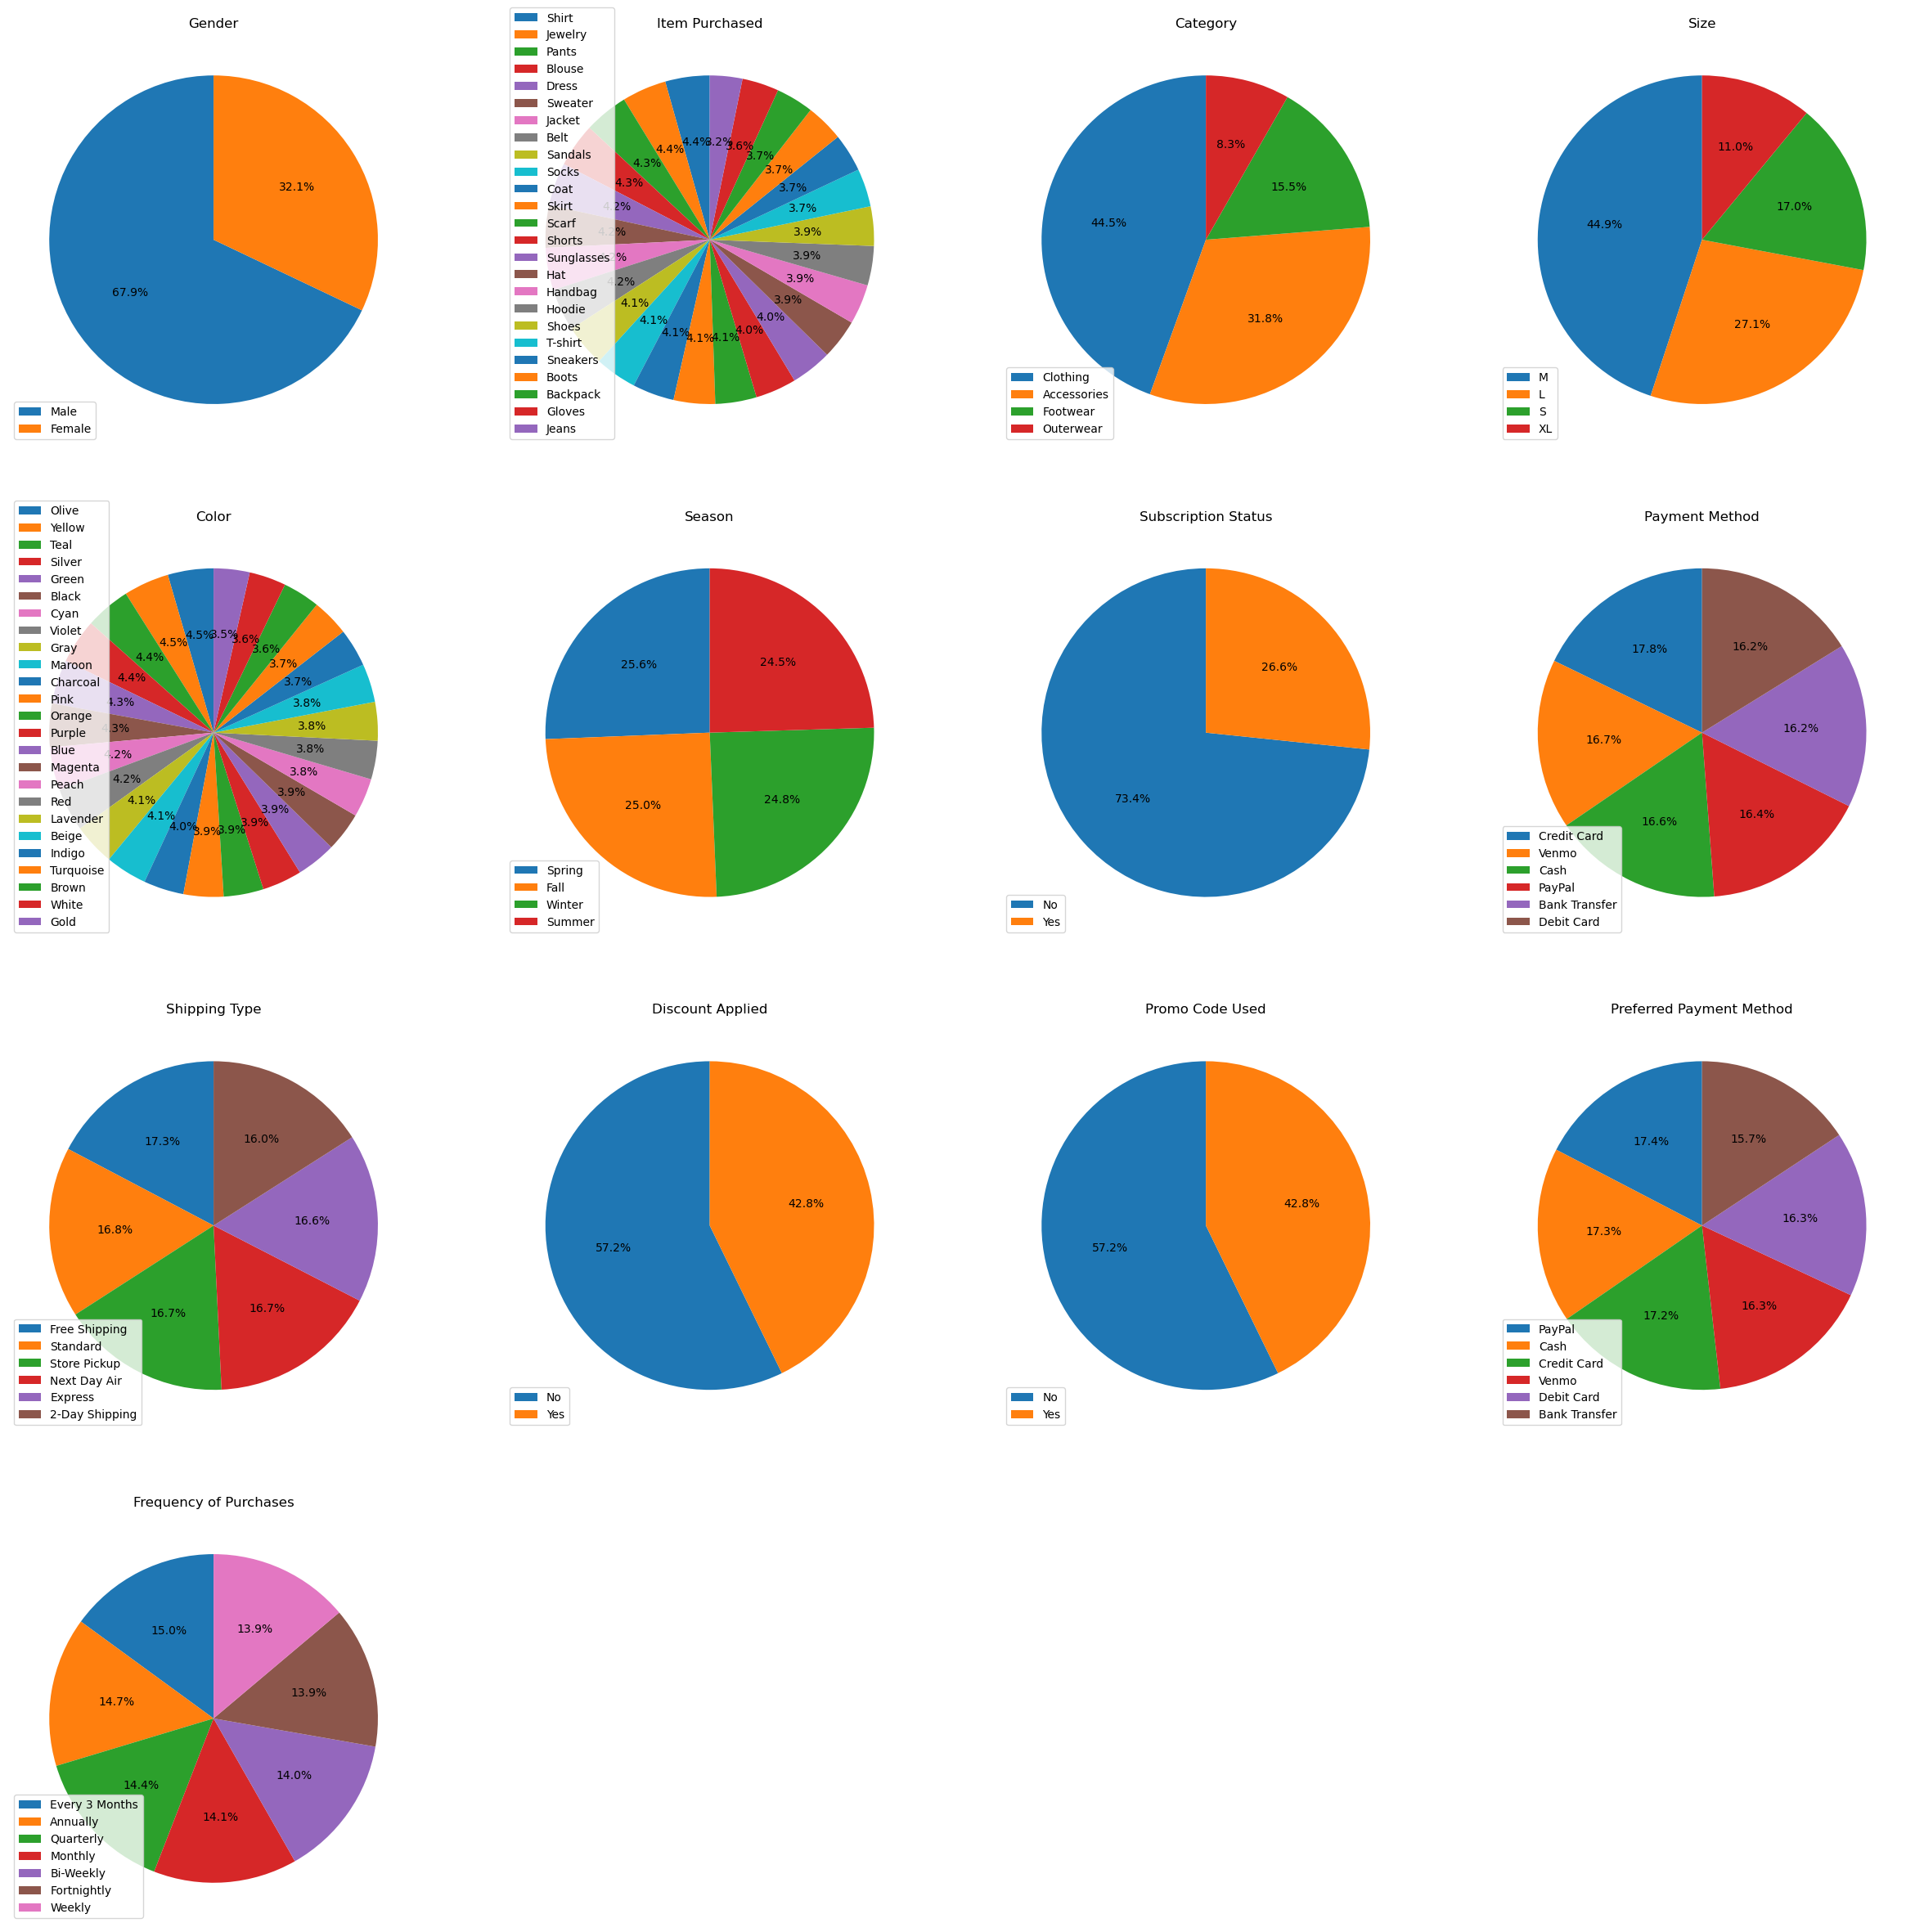

In [229]:
plt.figure(figsize=(30, 30))
categorical_profile = categorical_profile.drop(columns=["Location"])

for i, col in enumerate(categorical_profile.columns.tolist()):
    plt.subplot(4, 4, i+1)
    plt.pie(categorical_profile.loc["distribution"][col].values(), autopct='%1.1f%%', startangle=90)
    plt.title(col)
    plt.legend(loc='lower left', labels=categorical_profile.loc["distribution"][col].keys())

plt.show()

Nhận xét:

Nhìn chung các thuộc tính điều được phân bố rất đồng đều, tuy nhiên vẫn có một số thuộc tính có sự phân hoá. Từ đó ta có thể đưa ra một số kết luận như sau:

- Đa số người mua sắm chủ yếu là giới tính nữ.

- Các sản phẩm được mua đa số là quần áo và phụ kiện.

- Size của sản phẩm chủ yếu là size `M` và `L`

- Đại đa số người dùng chưa tham gia hội viên.